In [1]:
# https://github.com/HareeshBahuleyan/music-genre-classification
# https://github.com/derekahuang/Music-Classification

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhijeetchintakunta","key":"5a0d6406b54fbcaf1552bfcb274a5f6f"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 75 Apr  9 00:22 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

100% 1.21G/1.21G [00:56<00:00, 21.8MB/s]
100% 1.21G/1.21G [00:56<00:00, 23.1MB/s]


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [10]:
!pip install ivy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [28]:
import librosa

y,sr = librosa.load("/content/Data/genres_original/blues/blues.00000.wav")

array([[1.0667158e+00, 1.3738791e+00, 7.4453592e-01, ..., 2.2329819e+00,
        2.3039393e+00, 1.7840998e+01],
       [2.0423386e+00, 3.5833352e+00, 5.0216441e+00, ..., 8.1621199e+00,
        2.3028362e+01, 3.9680309e+01],
       [3.6309794e-01, 4.1330239e-01, 2.9910862e+00, ..., 3.6882620e+00,
        4.0284939e+01, 4.0200466e+01],
       ...,
       [1.3754310e-07, 1.5878594e-07, 2.6747733e-07, ..., 1.0966727e-07,
        1.2381977e-06, 4.3922013e-05],
       [4.9770961e-08, 2.5216677e-08, 1.5669674e-08, ..., 1.3073845e-08,
        8.1212079e-07, 4.1337862e-05],
       [3.4685510e-08, 1.2886811e-08, 4.3950092e-09, ..., 5.0736926e-09,
        7.6096529e-07, 4.0336636e-05]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

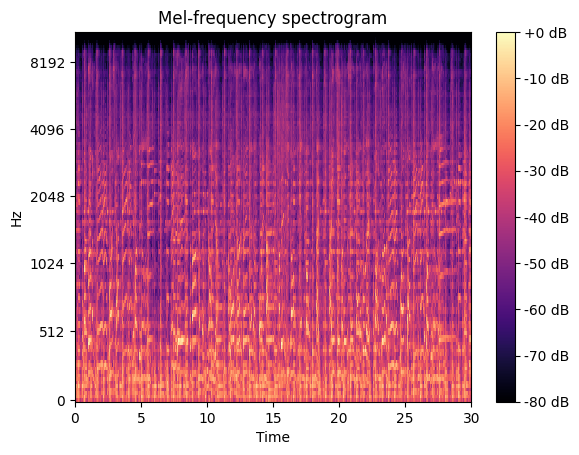

In [30]:
# Mel Spectrogram from data

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [11]:
# we will use VGG16 model as feature extractor
# to pass images to VGG16 we need to do transformations

import ivy,torch
import torchvision
from torchvision import transforms as T

preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_path = "/content/Data/images_original"
dataset = torchvision.datasets.ImageFolder(data_path,transform=preprocess)

In [12]:
full_dataset = dataset.__len__()
train_size = int(0.8 * full_dataset)
test_size = full_dataset - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [14]:
ivy.set_backend("torch")
device = "gpu:0" if ivy.gpu_is_available() else "cpu"
ivy.set_default_device(device)
ivy.set_soft_device_mode(True)

In [15]:
!git clone https://github.com/unifyai/models

Cloning into 'models'...
remote: Enumerating objects: 2365, done.
remote: Counting objects: 100% (859/859), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 2365 (delta 680), reused 601 (delta 522), pack-reused 1506
Receiving objects: 100% (2365/2365), 287.43 MiB | 13.46 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [16]:
cd models

/content/models


In [17]:
!pip install .

Processing /content/models
  Preparing metadata (setup.py) ... done
  Created wheel for ivy-models: filename=ivy_models-1.1.10-py3-none-any.whl size=76449 sha256=76f7c2a62e26c0cb74f65ec47721573d5e38abe97aa63cc17289a0e5b81d39ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-tov8_yh2/wheels/83/88/de/2952423778c3c3d2109d0c42fa73287e8aedcd26ee33add65f
Successfully built ivy-models


In [18]:
# downloading vgg16 weights from Ivy Models repository

from ivy_models.vgg import vgg16
ivy_vgg16 = vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 157MB/s]


In [19]:
ivy_vgg16.features

Sequential(v0=Conv2D(3, 64, filter_shape=[3, 3], strides=1, padding=1), v1=ReLU(complex_mode=jax), v2=Conv2D(64, 64, filter_shape=[3, 3], strides=1, padding=1), v3=ReLU(complex_mode=jax), v4=MaxPool2D(kernel_size=2, stride=2, padding=0), v5=Conv2D(64, 128, filter_shape=[3, 3], strides=1, padding=1), v6=ReLU(complex_mode=jax), v7=Conv2D(128, 128, filter_shape=[3, 3], strides=1, padding=1), v8=ReLU(complex_mode=jax), v9=MaxPool2D(kernel_size=2, stride=2, padding=0), v10=Conv2D(128, 256, filter_shape=[3, 3], strides=1, padding=1), v11=ReLU(complex_mode=jax), v12=Conv2D(256, 256, filter_shape=[3, 3], strides=1, padding=1), v13=ReLU(complex_mode=jax), v14=Conv2D(256, 256, filter_shape=[3, 3], strides=1, padding=1), v15=ReLU(complex_mode=jax), v16=MaxPool2D(kernel_size=2, stride=2, padding=0), v17=Conv2D(256, 512, filter_shape=[3, 3], strides=1, padding=1), v18=ReLU(complex_mode=jax), v19=Conv2D(512, 512, filter_shape=[3, 3], strides=1, padding=1), v20=ReLU(complex_mode=jax), v21=Conv2D(512,

In [20]:
for batch,(X,y) in enumerate(train_dataloader):
  inputs = ivy.permute_dims(ivy.array(X.numpy()), (0, 2, 3, 1))
  print(ivy_vgg16.features(inputs).shape)
  break

ivy.Shape(16, 7, 7, 512)


In [21]:
ivy.flatten(ivy.array([[2,3,4],[2,3,4]]))

ivy.array([2, 3, 4, 2, 3, 4], dev=gpu:0)

In [22]:
class ConvNet(ivy.Module):
  def __init__(self):
    super(ConvNet,self).__init__(v=None)

  def _build(self,*args, **kwargs):
    self.classifier = ivy.Sequential(
        ivy.Linear(7 * 7 * 512, 4096),
        ivy.ReLU(),
        ivy.Dropout(prob=0.5),
        ivy.Linear(4096, 2048),
        ivy.ReLU(),
        ivy.Dropout(prob=0.5),
        ivy.Linear(2048, 10),
    )
  def _forward(self,x):
    x = ivy.permute_dims(x, (0, 2, 3, 1))
    out = ivy_vgg16.features(x)
    out = ivy.flatten(out,start_dim=1)
    out = self.classifier(out)
    return ivy.softmax(out,axis=-1)

In [23]:
ivy_convnet = ConvNet()
ivy_convnet.v

{
    classifier: {
        submodules: {
            v0: {
                b: (<class ivy.data_classes.array.array.Array> shape=[4096]),
                w: (<class ivy.data_classes.array.array.Array> shape=[4096, 25088])
            },
            v3: {
                b: (<class ivy.data_classes.array.array.Array> shape=[2048]),
                w: (<class ivy.data_classes.array.array.Array> shape=[2048, 4096])
            },
            v6: {
                b: ivy.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dev=gpu:0),
                w: (<class ivy.data_classes.array.array.Array> shape=[10, 2048])
            }
        }
    }
}

In [24]:
ivy_convnet = ConvNet()
optim = ivy.AdamW(lr = 0.0001)

def accuracy_score(true,predicted):
  return ivy.sum(true==predicted)/true.shape[0]

def loss_fn(v,x,y):
  pred = ivy_convnet(x, v=v)
  return ivy.cross_entropy(y, pred)

def train(train_dataloader,loss_fn,optimizer,epochs):
  for epoch in range(epochs):
    print(f"Epoch : {epoch}")
    for batch,(X,y) in enumerate(train_dataloader):
      output = ivy_convnet(ivy.array(X.numpy()))
      y_one_hot = ivy.one_hot(ivy.array(y.numpy()),10)
      loss, grads = ivy.execute_with_gradients(lambda params: loss_fn(*params), (ivy_convnet.v,ivy.array(X.numpy()),y_one_hot))
      ivy_convnet.v = optim.step(ivy_convnet.v, grads)
      loss = ivy.to_numpy(loss).mean().item()
      if batch%25 == 0:
        output = output.argmax(axis=1)
        acc = accuracy_score(output,y) * 100
        print(f"Batch {batch} Loss {loss} Accuracy {acc.item()}")

In [25]:
train(train_dataloader,loss_fn,optim,10)

Epoch : 0
Batch 0 Loss 0.3249867260456085 Accuracy 25.0
Batch 25 Loss 0.2015284150838852 Accuracy 43.75
Epoch : 1
Batch 0 Loss 0.13793286681175232 Accuracy 50.0
Batch 25 Loss 0.06637867540121078 Accuracy 75.0
Epoch : 2
Batch 0 Loss 0.11292753368616104 Accuracy 68.75
Batch 25 Loss 0.06796570867300034 Accuracy 62.5
Epoch : 3
Batch 0 Loss 0.06257731467485428 Accuracy 75.0
Batch 25 Loss 0.08320534229278564 Accuracy 75.0
Epoch : 4
Batch 0 Loss 0.14912615716457367 Accuracy 87.5
Batch 25 Loss 0.08303608000278473 Accuracy 75.0
Epoch : 5
Batch 0 Loss 0.05050727352499962 Accuracy 87.5
Batch 25 Loss 0.05811046436429024 Accuracy 81.25
Epoch : 6
Batch 0 Loss 0.05534866452217102 Accuracy 87.5
Batch 25 Loss 0.011654229834675789 Accuracy 93.75
Epoch : 7
Batch 0 Loss 0.011408120393753052 Accuracy 87.5
Batch 25 Loss 0.027462054044008255 Accuracy 75.0
Epoch : 8
Batch 0 Loss 0.011516697704792023 Accuracy 100.0
Batch 25 Loss 0.022170748561620712 Accuracy 93.75
Epoch : 9
Batch 0 Loss 0.005544835235923529 Ac

In [26]:
acc = 0
for batch,(X,y) in enumerate(test_dataloader):
  output = ivy_convnet(ivy.array(X.numpy()))
  output = output.argmax(axis=1).cpu().numpy()
  acc += accuracy_score(output,y.numpy()) * 100
  print(f"Accuracy Score {accuracy_score(output,y.numpy()) * 100}")
print(f"Accuracy {acc/13}")

Accuracy Score ivy.array(56.25, dev=gpu:0)
Accuracy Score ivy.array(56.25, dev=gpu:0)
Accuracy Score ivy.array(62.5, dev=gpu:0)
Accuracy Score ivy.array(31.25, dev=gpu:0)
Accuracy Score ivy.array(62.5, dev=gpu:0)
Accuracy Score ivy.array(62.5, dev=gpu:0)
Accuracy Score ivy.array(62.5, dev=gpu:0)
Accuracy Score ivy.array(81.25, dev=gpu:0)
Accuracy Score ivy.array(31.25, dev=gpu:0)
Accuracy Score ivy.array(68.75, dev=gpu:0)
Accuracy Score ivy.array(81.25, dev=gpu:0)
Accuracy Score ivy.array(68.75, dev=gpu:0)
Accuracy Score ivy.array(75., dev=gpu:0)
Accuracy ivy.array(61.53845978, dev=gpu:0)
